In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from intent_classification_helper import *

In [2]:
atis_train = pd.read_csv('/content/drive/MyDrive/nlp_datasets/ATIS dataset/atis_intents_train.csv', error_bad_lines=False, 
                   engine='python', encoding='utf-8', names=['intent', 'message'])
atis_test = pd.read_csv('/content/drive/MyDrive/nlp_datasets/ATIS dataset/atis_intents_test.csv', error_bad_lines=False, 
                   engine='python', encoding='utf-8', names=['intent', 'message'])
assert(set(atis_train['intent']) == set(atis_test['intent']))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
atis_train['intent'].value_counts()

atis_flight            3666
atis_airfare            423
atis_ground_service     255
atis_airline            157
atis_abbreviation       147
atis_aircraft            81
atis_flight_time         54
atis_quantity            51
Name: intent, dtype: int64

In [4]:
atis_train = balance_class(atis_train, 'message', 'intent')

In [5]:
atis_train['intent'].value_counts()

atis_flight            3666
atis_flight_time       3666
atis_airfare           3666
atis_aircraft          3666
atis_ground_service    3666
atis_airline           3666
atis_abbreviation      3666
atis_quantity          3666
Name: intent, dtype: int64

In [10]:
y_train = atis_train['intent'].tolist()
y_test = atis_test['intent'].tolist()

In [6]:
# preprocess text
print('Preprocessing text on training set...')
preprocess_text(atis_train, 'message')

print('Preprocessing text on test set...')
preprocess_text(atis_test, 'message')

Preprocessing text on training set...


Start text preprocessing: 
--------------------------
Converting to lowercase...
--------------------------
Removing html tags...
--------------------------
Removing nonword characters...
--------------------------
Removing stopwords...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text preprocessing completed.


Preprocessing text on test set...


Start text preprocessing: 
--------------------------
Converting to lowercase...
--------------------------
Removing html tags...
--------------------------
Removing nonword characters...
--------------------------
Removing stopwords...
Text preprocessing completed.




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
# kmeans_label_map is acquired using the below script with all TF-IDF features:

# label_map = {}

# for i in range(len(y_train)):
#   key = '{} {}'.format(kmeans.labels_[i], y_train[i])
#   if key in label_map:
#     label_map[key] += 1
#   else:
#     label_map[key] = 1

# '0 atis_airfare': 2323,
# '1 atis_aircraft': 2430,
# '2 atis_quantity': 1773,
# '3 atis_abbreviation': 1404,
# '4 atis_flight_time': 1779,
# '5 atis_airline': 1031,
# '6 atis_ground_service': 3065,
# '7 atis_flight': 1481

kmeans_label_map = {0: 'atis_airfare', 1: 'atis_aircraft', 2: 'atis_quantity', 3: 'atis_abbreviation', 4: 'atis_flight_time', 
                    5: 'atis_airline', 6: 'atis_ground_service', 7: 'atis_flight'}

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

def kmeans_tf_idf(feature_numbers=[40, 100, 200, 500, 1000]):
  
  # try different number of features
  for feature_number in feature_numbers:  
    tv = TfidfVectorizer(max_df=1.0, min_df=0, max_features=feature_number)
    
    x_train = atis_train['message'].tolist()
    x_test = atis_test['message'].tolist()

    tv.fit(x_train)
    x_train = tv.transform(x_train).toarray()
    x_test = tv.transform(x_test).toarray()

    vocab = tv.get_feature_names_out()

    print('TF-IDF vocabulary size: ', len(vocab))
    #print(pd.DataFrame(x_train, columns=vocab))
    
    num_classes = 8
    kmeans = KMeans(n_clusters=num_classes, random_state=8)
    kmeans.fit(x_train)

    y_true = y_test
    prediction = kmeans.predict(x_test)
    mapped_prediction = []

    for i in range(len(prediction)):
      mapped_prediction.append(kmeans_label_map[prediction[i]])

    prediction = mapped_prediction

    evaluate_model(model=None, name='kmeans_tf-idf_{}'.format(len(vocab)), x_test=x_test, y_test=y_test, num_features=len(vocab), path='/content/drive/MyDrive/nlp_datasets/ATIS dataset/models',
                   filename='evaluation_kmeans.csv', unsupervised=True, prediction=prediction)
    
    print()
    if feature_number < len(vocab):
      break

In [27]:
kmeans_tf_idf()

TF-IDF vocabulary size:  40
evaluate the model:  kmeans_tf-idf_40
accuracy score:  0.0875
balanced accuracy score:  0.013844936708860759
weighted precision:  0.7276315789473684
weighted recall:  0.0875
weighted f1 score:  0.15621468926553672
macro f1 score:  0.024717514124293783

TF-IDF vocabulary size:  100
evaluate the model:  kmeans_tf-idf_100
accuracy score:  0.14375
balanced accuracy score:  0.12862605485232068
weighted precision:  0.7523488398415392
weighted recall:  0.14375
weighted f1 score:  0.16695929247555838
macro f1 score:  0.04237452787664951



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  200
evaluate the model:  kmeans_tf-idf_200
accuracy score:  0.68125
balanced accuracy score:  0.10779272151898735
weighted precision:  0.6759026687598118
weighted recall:  0.68125
weighted f1 score:  0.6785657998423956
macro f1 score:  0.10736800630417652



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  500
evaluate the model:  kmeans_tf-idf_500
accuracy score:  0.0575
balanced accuracy score:  0.02897258309275298
weighted precision:  0.5433541451000691
weighted recall:  0.0575
weighted f1 score:  0.10090439635715637
macro f1 score:  0.02404486471456116



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  748
evaluate the model:  kmeans_tf-idf_748
accuracy score:  0.405
balanced accuracy score:  0.44840134985767066
weighted precision:  0.8774167691880949
weighted recall:  0.405
weighted f1 score:  0.5012615120378663
macro f1 score:  0.38939161118620735



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


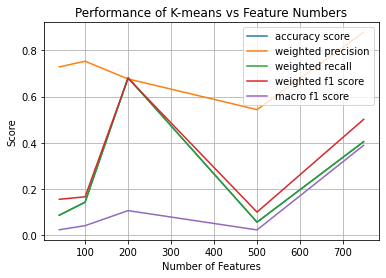

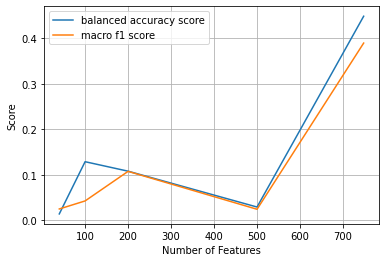

In [28]:
# plot the feature importance graph for random forest
plt.title('Performance of K-means vs Feature Numbers')
plt.xlabel('Number of Features')
plt.ylabel('Score')

eval_path = '/content/drive/MyDrive/nlp_datasets/ATIS dataset/models/evaluation_kmeans.csv'
eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')

feature_numbers = eval_result['num_features'].to_list()
accuracy_scores = eval_result['accuracy score'].to_list()
balanced_accuracy_scores = eval_result['balanced accuracy score'].to_list()
weighted_precision = eval_result['weighted precision'].to_list()
weighted_recall = eval_result['weighted recall'].to_list()
weighted_f1_scores = eval_result['weighted f1 score'].to_list()
macro_f1_scores = eval_result['macro f1 score'].to_list()

plt.plot(feature_numbers, accuracy_scores, label='accuracy score')
plt.plot(feature_numbers, weighted_precision, label='weighted precision')
plt.plot(feature_numbers, weighted_recall, label='weighted recall')
plt.plot(feature_numbers, weighted_f1_scores, label='weighted f1 score')
plt.plot(feature_numbers, macro_f1_scores, label='macro f1 score')
plt.legend()
plt.grid()

plt.figure()
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.plot(feature_numbers, balanced_accuracy_scores, label='balanced accuracy score')
plt.plot(feature_numbers, macro_f1_scores, label='macro f1 score')

plt.legend()
plt.grid()
plt.show()